In [72]:
import act
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, dates
from datetime import datetime,time,timedelta

import os
import warnings

import cartopy.crs as ccrs

import pyart
import hvplot.xarray
warnings.filterwarnings('ignore')

## Importing Data:
### COMBLE

In [ ]:
username = 'hseppala'


# Set the datastream and start/enddates
datastream = 'anxkazrcfrgeqcM1.b1'
startdate = '2020-03-12'
enddate = '2020-03-14'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

In [52]:
files = sorted(result)
ds = xr.open_mfdataset(files[24:])

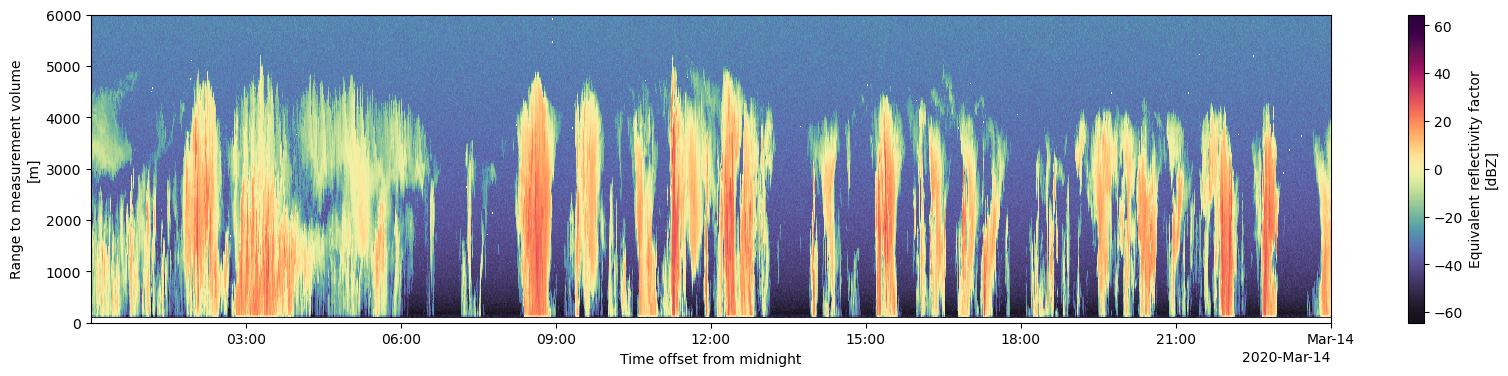

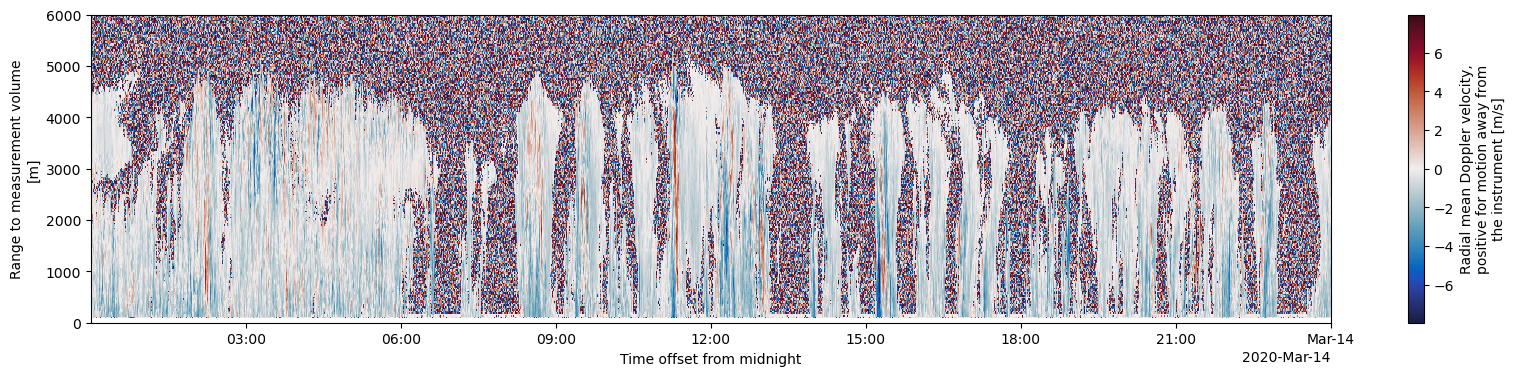

In [77]:
ds.reflectivity.plot(x='time',cmap='pyart_SpectralExtended',size=4,aspect=5,ylim=[0,6000])
ds.mean_doppler_velocity.plot(x='time',cmap='pyart_balance',size=4,aspect=5,ylim=[0,6000])

### NSA

In [ ]:
datastream = 'nsakazrcfrgeC1.a1'
startdate = '2020-10-06'
enddate = '2020-10-07'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

In [99]:
files = sorted(result)

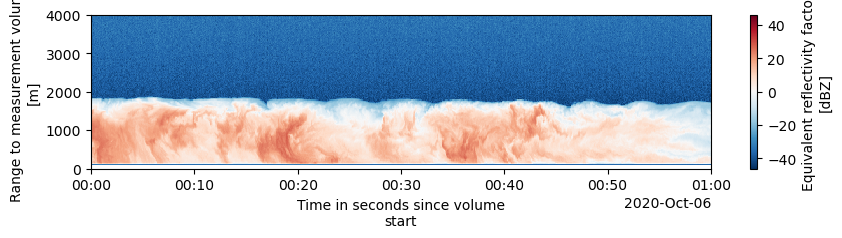

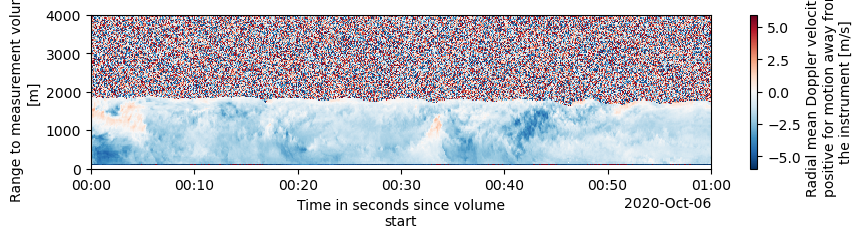

In [109]:
for i in [files[-3]]:
    ds = xr.open_dataset(i)
    ds.reflectivity.plot(x='time',ylim=[0,4000],size=2,aspect=5)
    plt.show()
    ds.mean_doppler_velocity.plot(x='time',ylim=[0,4000],size=2,aspect=5)

## Cloud Phase: NSA

In [130]:
datastream = 'nsathermocldphaseC1.c1'
startdate = '2020-10-06'
enddate = '2020-10-06'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsathermocldphaseC1.c1.20201006.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., & Levin, M. Thermodynamic cloud phase (THERMOCLDPHASE). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1871014



In [131]:
print(result)
ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

['/data/home/hseppala/ARM-2024-high-latitude/notebooks/nsathermocldphaseC1.c1/nsathermocldphaseC1.c1.20201006.000000.nc']


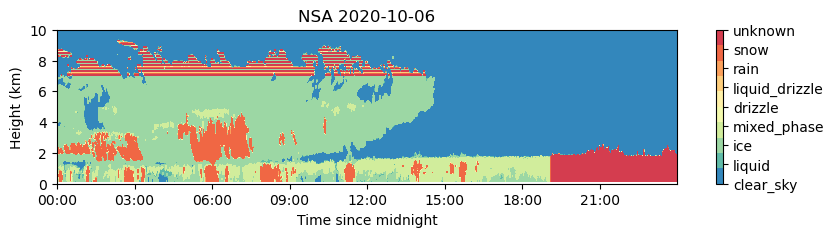

In [144]:
cp = np.transpose(np.array(ds.cloud_phase_mplgr))
h = np.array(ds.height)
t = np.array(ds.time)

fig, ax = plt.subplots(figsize=(10,2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
cf = ax.contourf(t,h,cp,cmap = "Spectral_r",levels=9,vmin=-0.5,vmax=8.5)
cbar = fig.colorbar(cf,ticks=[0,1,2,3,4,5,6,7,8])
cbar.ax.set_yticklabels(['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown'])
ax.set_ylim(0,10)
ax.set_title('NSA 2020-10-06')
ax.set_xlabel('Time since midnight')
ax.set_ylabel('Height (km)')
plt.show()

### Cloud Phase: COMBLE

In [6]:
datastream = 'anxthermocldphaseM1.c1'
startdate = '2020-03-13'
enddate = '2020-03-13'
# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxthermocldphaseM1.c1.20200313.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., & Levin, M. Thermodynamic cloud phase (THERMOCLDPHASE). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1871014



In [ ]:
phases = ['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown']
print(phases)
ds = act.io.read_arm_netcdf(result)
ds.clean.cleanup()

In [107]:
cp = np.transpose(np.array(ds.cloud_phase_mplgr))
h = np.array(ds.height)
t = np.array(ds.time)
print(len(t),t)

2880 2020-03-13T00:00:00.000000000


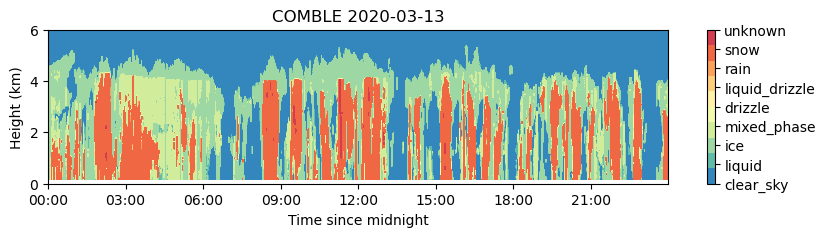

In [129]:
fig, ax = plt.subplots(figsize=(10,2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
cf = ax.contourf(t,h,cp,cmap = "Spectral_r",levels=9,vmin=-0.5,vmax=8.5)
cbar = fig.colorbar(cf,ticks=[0,1,2,3,4,5,6,7,8])
cbar.ax.set_yticklabels(['clear_sky', 'liquid', 'ice', 'mixed_phase', 'drizzle', 'liquid_drizzle', 'rain', 'snow', 'unknown'])
ax.set_ylim(0,6)
ax.set_title('COMBLE 2020-03-13')
ax.set_xlabel('Time since midnight')
ax.set_ylabel('Height (km)')
plt.show()